In [43]:
from google.colab import files

In [44]:
import pandas as pd

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_excel ("/content/drive/MyDrive/MLAssignment/Insurance_Updated.xlsx")

**Summarize Data**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_days             1000 non-null   int64  
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [48]:
# List of features to drop
features_to_drop = [
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'incident_location',
    'property_damage',
    'police_report_available',
    'auto_make',
    'auto_model',
    '_c39'
]

# Drop the specified features from the dataframe
df.drop(columns=features_to_drop, inplace=True)

# Now df contains the dataset with the specified features dropped

In [49]:
# df.info()

In [50]:
# df = pd.get_dummies(df, columns=['fraud_reported'])

In [51]:
# num_attributes = df.shape[1] - 1
# print("Number of attributes:", num_attributes)


In [52]:
# Encoding fraud_reported(dependent variable column)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.fraud_reported)
df['fraud_reported'] = le.transform(df.fraud_reported)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_days             1000 non-null   int64  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_days                1000 non-null   int64  
 11  incident_hour_of_the_day     1000 non-null   int64  
 12  number_of_vehicles_involved  1000 non-null   int64  
 13  bodily_injuries    

In [54]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier


# # Selecting features and target from the DataFrame
# selected_features = ['months_as_customer', 'age', 'policy_number', 'policy_bind_days',
#                      'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
#                      'insured_zip', 'capital-gains', 'capital-loss', 'incident_days',
#                      'incident_hour_of_the_day', 'number_of_vehicles_involved',
#                      'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
#                      'auto_year', 'fraud_reported']  # Remaining variables

# X = df[selected_features]
# y = df['fraud_reported']  # Assuming 'fraud_reported' is the target column

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

# # Fitting a random forest classifier
# forest = RandomForestClassifier(random_state=0)
# forest.fit(X_train, y_train)

# # Computing feature importances
# feature_importances = pd.Series(forest.feature_importances_, index=X.columns)

# # Sorting feature importances in descending order
# feature_importances_sorted = feature_importances.sort_values(ascending=False)

# # Printing feature importances
# print("Feature importances:")
# print(feature_importances_sorted)


In [55]:
# List of features to drop based as they have less feature importance
features_to_drop = ['umbrella_limit', 'number_of_vehicles_involved', 'policy_deductable']

# Drop specified features from the DataFrame
df.drop(columns=features_to_drop, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   policy_number             1000 non-null   int64  
 3   policy_bind_days          1000 non-null   int64  
 4   policy_annual_premium     1000 non-null   float64
 5   insured_zip               1000 non-null   int64  
 6   capital-gains             1000 non-null   int64  
 7   capital-loss              1000 non-null   int64  
 8   incident_days             1000 non-null   int64  
 9   incident_hour_of_the_day  1000 non-null   int64  
 10  bodily_injuries           1000 non-null   int64  
 11  witnesses                 1000 non-null   int64  
 12  total_claim_amount        1000 non-null   int64  
 13  injury_claim              1000 non-null   int64  
 14  property_

In [57]:
# from scipy import stats

# # Assume df is your DataFrame

# # Calculate Z-score for each data point
# z_scores = stats.zscore(df)

# # Define threshold for outliers
# threshold = 3  # Can be adjusted based on the level of sensitivity desired

# # Find outliers
# outliers = df[(z_scores > threshold).any(axis=1)]


In [58]:
# print("Outliers detected using Z-score method:")
# print(outliers)


In [59]:
# df = df[(z_scores <= threshold).all(axis=1)]
#remove outliers

In [60]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.fraud_reported == 0]
df_minority = df[df.fraud_reported == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # for reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.fraud_reported.value_counts()
df = df_upsampled

In [61]:
#df after removing outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1506 entries, 2 to 39
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1506 non-null   int64  
 1   age                       1506 non-null   int64  
 2   policy_number             1506 non-null   int64  
 3   policy_bind_days          1506 non-null   int64  
 4   policy_annual_premium     1506 non-null   float64
 5   insured_zip               1506 non-null   int64  
 6   capital-gains             1506 non-null   int64  
 7   capital-loss              1506 non-null   int64  
 8   incident_days             1506 non-null   int64  
 9   incident_hour_of_the_day  1506 non-null   int64  
 10  bodily_injuries           1506 non-null   int64  
 11  witnesses                 1506 non-null   int64  
 12  total_claim_amount        1506 non-null   int64  
 13  injury_claim              1506 non-null   int64  
 14  property_claim 

In [62]:
#CNN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Assuming your dataset is in a CSV file

# Select features (X) and target variable (y)
X = df.iloc[:,0:17]  # Features
y = df.iloc[:,17]    # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for CNN (add an additional dimension for channels)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Optional dropout layer for regularization
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4872 - loss: 0.7061 - val_accuracy: 0.5270 - val_loss: 0.6872
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5478 - loss: 0.6818 - val_accuracy: 0.5602 - val_loss: 0.6798
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5860 - loss: 0.6680 - val_accuracy: 0.5685 - val_loss: 0.6806
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6207 - loss: 0.6564 - val_accuracy: 0.5768 - val_loss: 0.6698
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6662 - loss: 0.6310 - val_accuracy: 0.5975 - val_loss: 0.6693
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6480 - loss: 0.6331 - val_accuracy: 0.6017 - val_loss: 0.6635
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - loss: 0.6088 - val_accuracy: 0.6017 - val_loss: 0.6654
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6467 - loss: 0.6213 - val_accuracy: 0.6266 - val_loss

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_reshaped)

# Binarize predictions based on a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Flatten y_pred to make it compatible with y_test
y_pred = y_pred.flatten()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)




10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.7218543046357616
Precision: 0.6988636363636364
Recall: 0.7987012987012987
F1-score: 0.7454545454545456
ROC-AUC: 0.7202965952965953
Confusion Matrix:
 [[ 95  53]
 [ 31 123]]


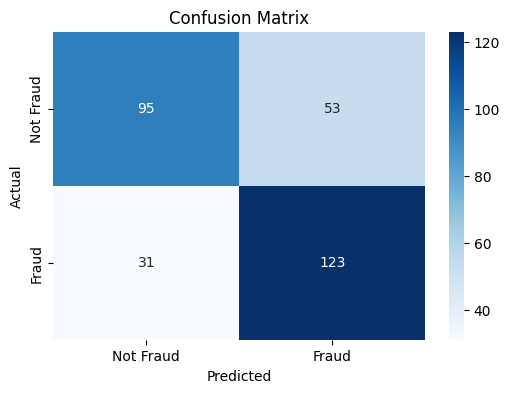

In [64]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()